# The following notebook consists of several visualisation techniques and inferences (top 5 actionable insights) from the dataset.

### Importing the libraries required for successful execution and plotting

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shapefile as shp
import geopandas as gpd
import os
import urllib
import seaborn as sns

#### Now, let's import the dataset.

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### Let's see what all is present in the dataset

In [3]:
df.head()
print(df.shape, df_test.shape)

(82657, 12) (20665, 11)


In [4]:
df = df.append(df_test, ignore_index = True)

C:\Users\daddy\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


### First, let's visualise how the wine production market is spread on a global scale (on a World Map)

In [5]:
#Reading the shape file of the World Map
fp = "TM_WORLD_BORDERS-0.3.shp"
map_df = gpd.read_file(fp)
map_df.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [6]:
#Extracting the required columns for heat-map plotting
map_df = map_df[['NAME', 'geometry']]

In [7]:
city_new = df['country'].value_counts()

#Storing the coutry names along with their corresponding wine production count
#in 2 seperate lists using iteration
Country = []
Value = []

for i in city_new.index:
    Country.append(i)
    
for i in city_new.values:
    Value.append(i)

In [8]:
#Creating the dataframe which is to be used for map plotting
dsa = {'COUNTRY':Country, 'COUNT':Value}
DSA = pd.DataFrame(dsa)

In [9]:
# Join both the DataFrames by state names

merged = map_df.set_index('NAME').join(DSA.set_index('COUNTRY'))
merged.head()

,geometry,COUNT
NAME,,
Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",NaN
Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",NaN
Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",NaN
Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",NaN
Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",1.0


C:\Users\daddy\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


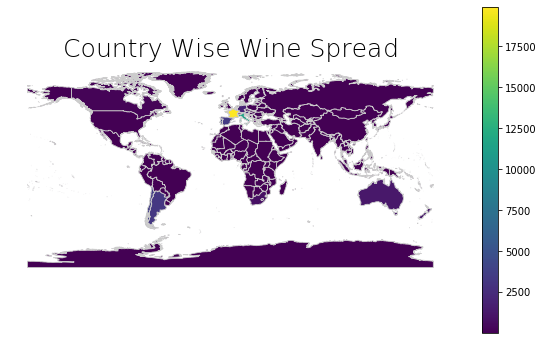

In [10]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Country Wise Wine Spread', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='COUNT', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

## RESULT 1:  As seen from the above map(even though it's not easily readable), we can infer that the regions of EUROPE and SOUTH AMERICA are major wine producers amongst all the countries present in the dataset.

### PS: The above map can be made better by having a larger database and lesser NULL entries.

#### Now, we'll use pie-chart to visualise few more insights from the dataset. 

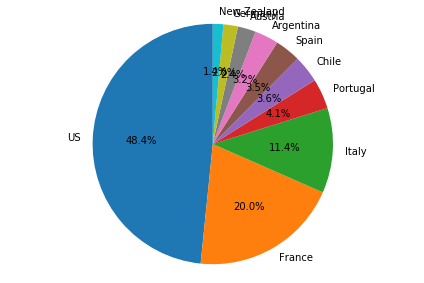

In [11]:
# Create a pie chart
plt.pie(
    # using data total)arrests
    DSA['COUNT'].head(10),
    # with the labels being officer names
    labels=DSA['COUNTRY'].head(10),
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## RESULT 1 contd: As seen from the above pie-chart, an overall cumulation of European countries hold a major part in wine production of the world. Also, if we cumulate the US, they also have a major share as wine-producers.

### Now, let's visualise the general trends and figures of wine production, prices, ratings etc. from different provinces/wineries in the form of bar-charts.

In [12]:
#Removing NULL entries
df = df[pd.notnull(df.province)]

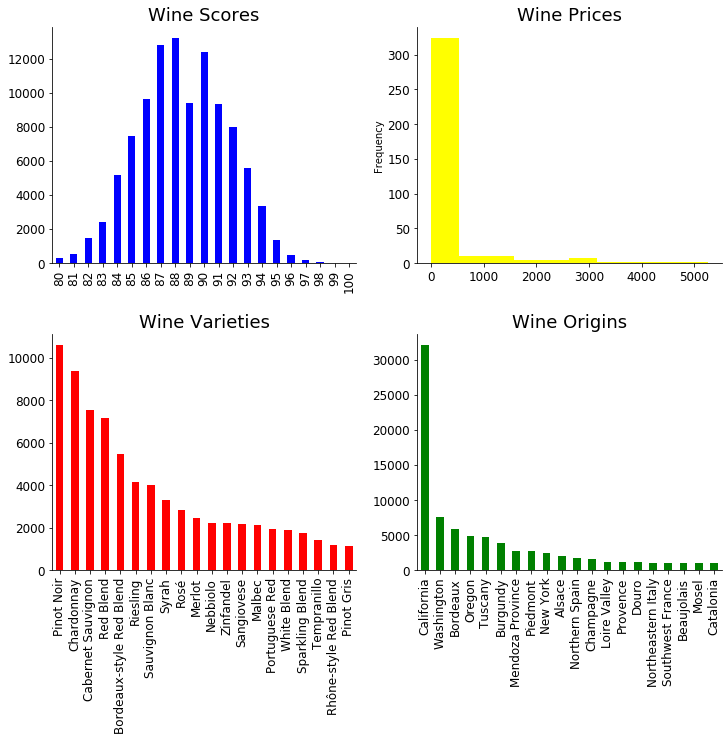

In [13]:
# Thus each individual subplot can be referred by considering the top left point as origin.

fig, axarr = plt.subplots(2,2, figsize = (12,10))

df['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='blue'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

df['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='red'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

df['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='green'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

df['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='yellow'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=0.3) # Gap between rows

sns.despine()

## RESULT 2: As seen from the above 4 graphs, we can infer the following points:

##                    1) Top 20 varieties amongst the world population
##                    2) Top 20 wine producing provinces
##                    3) Main range for wine-ratings given by reviewers
##                    4) Almost 90% of  wine costs less than 1000 (the respective unit of the                                       dataset)

### Now, let's analyse wine/rating, wine/cost, winery/cost and winery/rating graphs and their respective results

In [14]:
df = df[pd.notnull(df.variety)]
df = df[pd.notnull(df.winery)]

In [15]:
sub_df = df[['variety','points']].drop_duplicates()

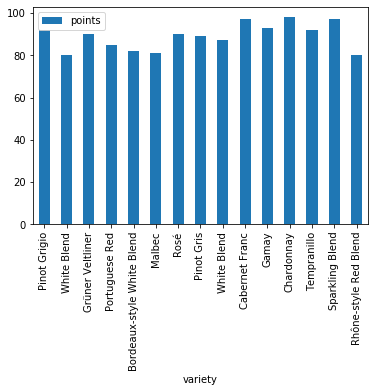

In [16]:
sub_df.sample(15).plot.bar(x='variety',y='points')

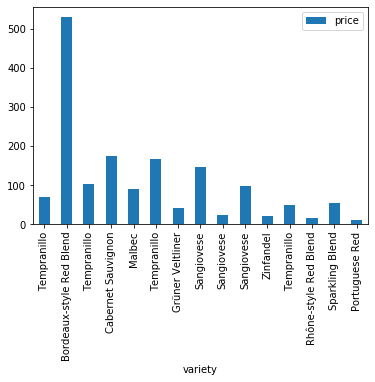

In [17]:
sub_df = df[['variety','price']].drop_duplicates()
sub_df.sample(15).plot.bar(x='variety',y='price')

## RESULT 3: Looking at the above 2 graphs, the following insights can be drawn:

### 1) The most expensive wine-variety has a considerable less rating as compared to other wines
### 2) All other wines other than Bordeaux-style Red Blend are way too cheap but still, they have considerably higher ratings than the most expensive variety.

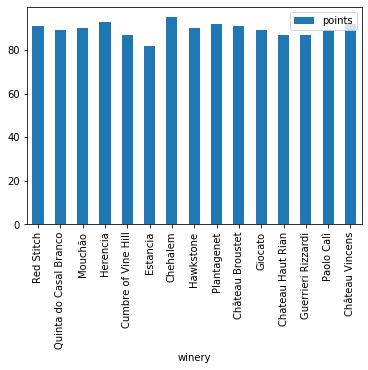

In [18]:
sub_df = df[['winery','points']].drop_duplicates()
sub_df.sample(15).plot.bar(x='winery',y='points')

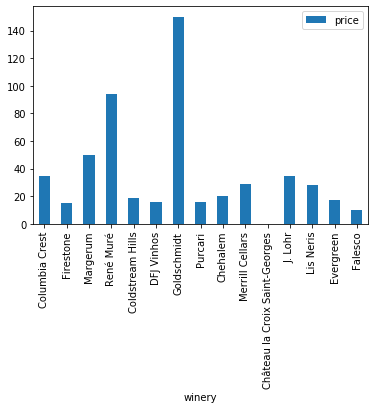

In [19]:
df.sample(15).plot.bar(x='winery',y='price')

## RESULT 4: From the above 2 graphs, we can extract and analyze which winery has the best ratings and price relation and popularity amongst the world population which can further be used for recommendation systems.

In [20]:
# Let's get tehe price_log to better work with this feature
df['price_log'] = np.log(df['price'])

C:\Users\daddy\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


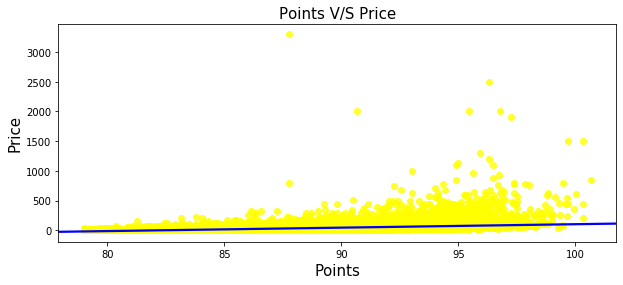

In [22]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', 
                data=df, line_kws={'color':'blue'},
                x_jitter=True, fit_reg=True, color='yellow')
g.set_title("Points V/S Price", fontsize=15)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

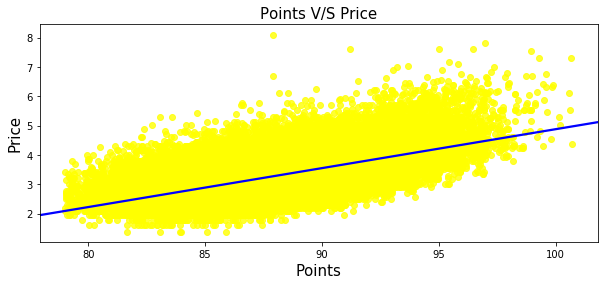

In [21]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'blue'},
                x_jitter=True, fit_reg=True, color='yellow')
g.set_title("Points V/S Price(log)", fontsize=15)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

## RESULT 5: As shown above, we have drawn 2 graphs showing the relation between the price and points of different varieties of wines. The following inferences can be made from the above plots:

### 1) The wines which are most expensive aren't the ones with highest ratings
### 2) The wines which are almost in the range of mean-cost seem to be more popular amongst the population
### 3) The most expensive wines seem to have mediocre ratings, i.e. between 87-95.

# SUMMARY:

### The above results can help us in building recommender systems/ help us analyze which places are good for opening up wine business/ good for investing in this industry depending on the ratings and visual graphs.